# Model Development

### Objectives

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/Yaswanth/Desktop/DSNB/DataSets/clean_laptops_df.csv", header=0, index_col=0)
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.000000,0.896552,8,256,3.74850,1891,Medium,0,1
234,Toshiba,3,2,1,5,13.299213,0.827586,8,256,2.64600,1950,Medium,1,0
235,Lenovo,4,2,1,5,12.000000,0.896552,8,256,2.99880,2236,Medium,0,1
236,Lenovo,3,3,1,5,15.598425,0.862069,6,256,5.29200,883,Low,1,0


# Task 1 : Single Linear Regression

Creating a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [7]:
X = df[["CPU_frequency"]]
Y = df["Price"]
lm = LinearRegression()
lm.fit(X, Y)
Yhat = lm.predict(X)
Yhat[0:10]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057, 1073.07834392, 1073.07834392, 1073.07834392,
       1534.00050386, 1175.50549057])

Generating the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_732\1028716797.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_732\1028716797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



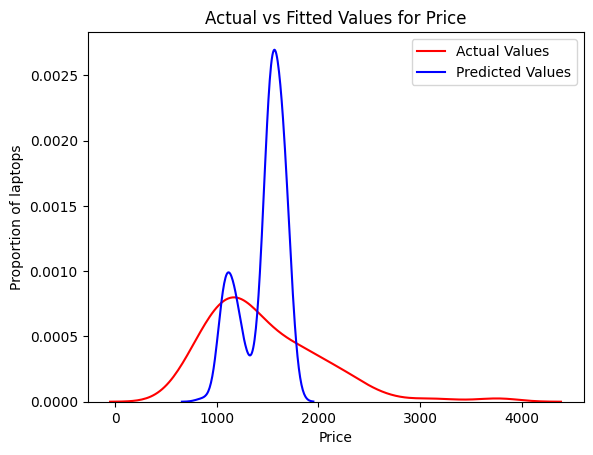

In [8]:
ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
sns.distplot(Yhat, hist=False, color="b", label="Predicted Values", ax = ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model.

In [9]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629
